In [11]:
import cv2
import os
from IPython.display import Image, display

In [12]:
ARUCO_DICT = {
    "DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
    "DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
    "DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
    "DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
    "DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
    "DICT_ARUCO_MIP_36h12": cv2.aruco.DICT_ARUCO_MIP_36h12,
    "DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11,
}

In [13]:
frames = ["image.jpeg", "image2.jpeg", "image3.jpeg", "image4.jpeg", "image5.jpeg"]

File: image.jpeg


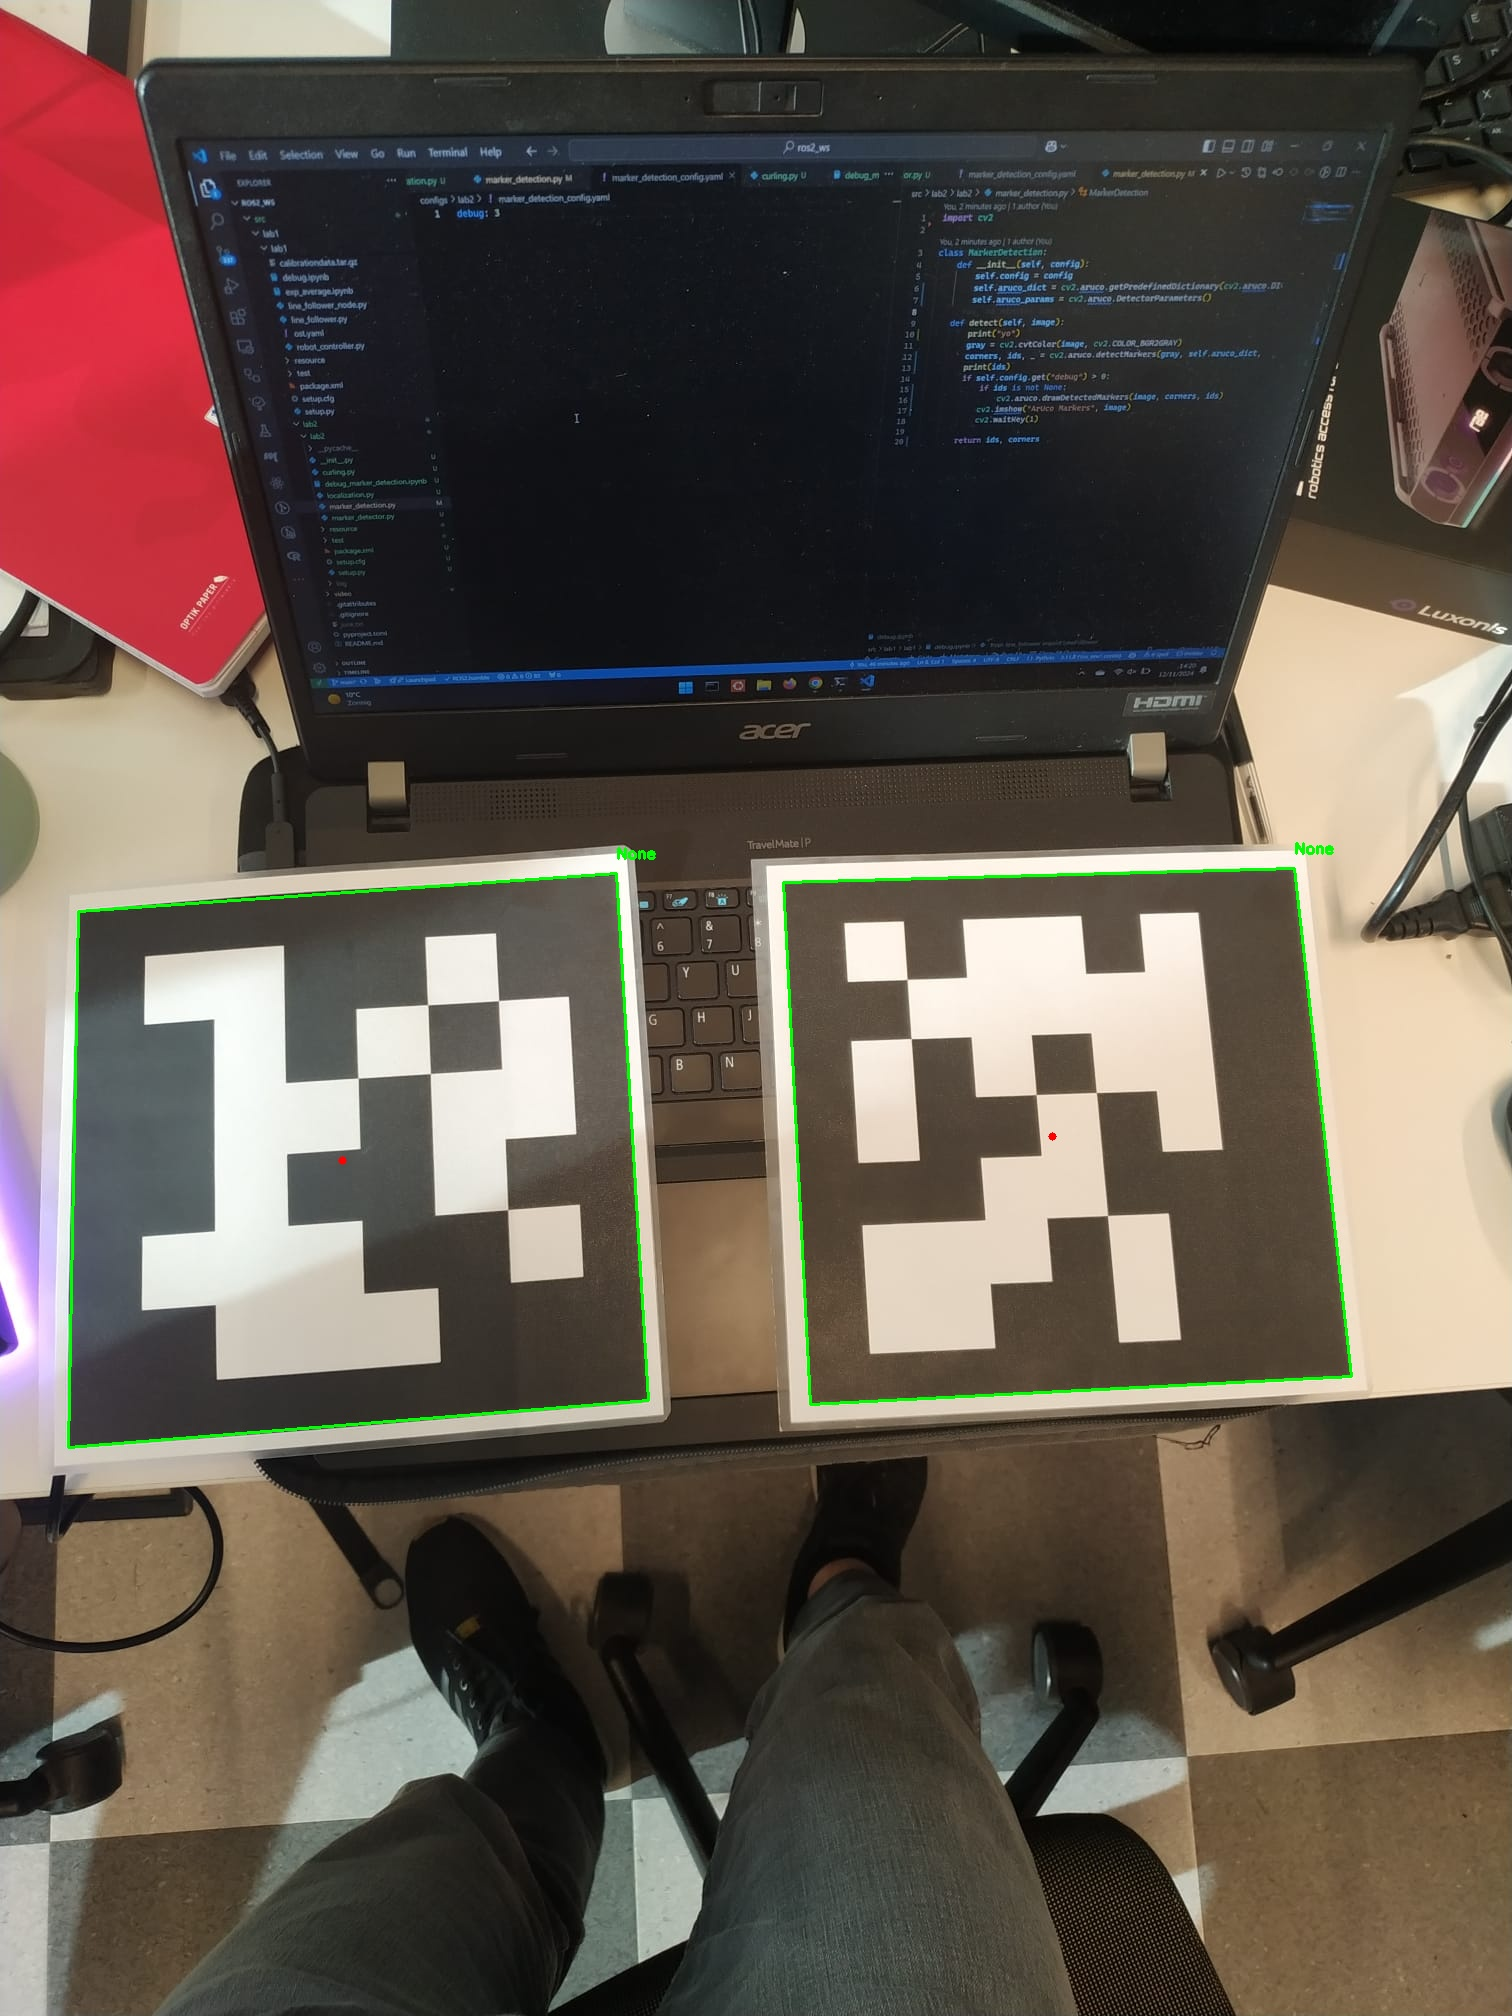

File: image2.jpeg


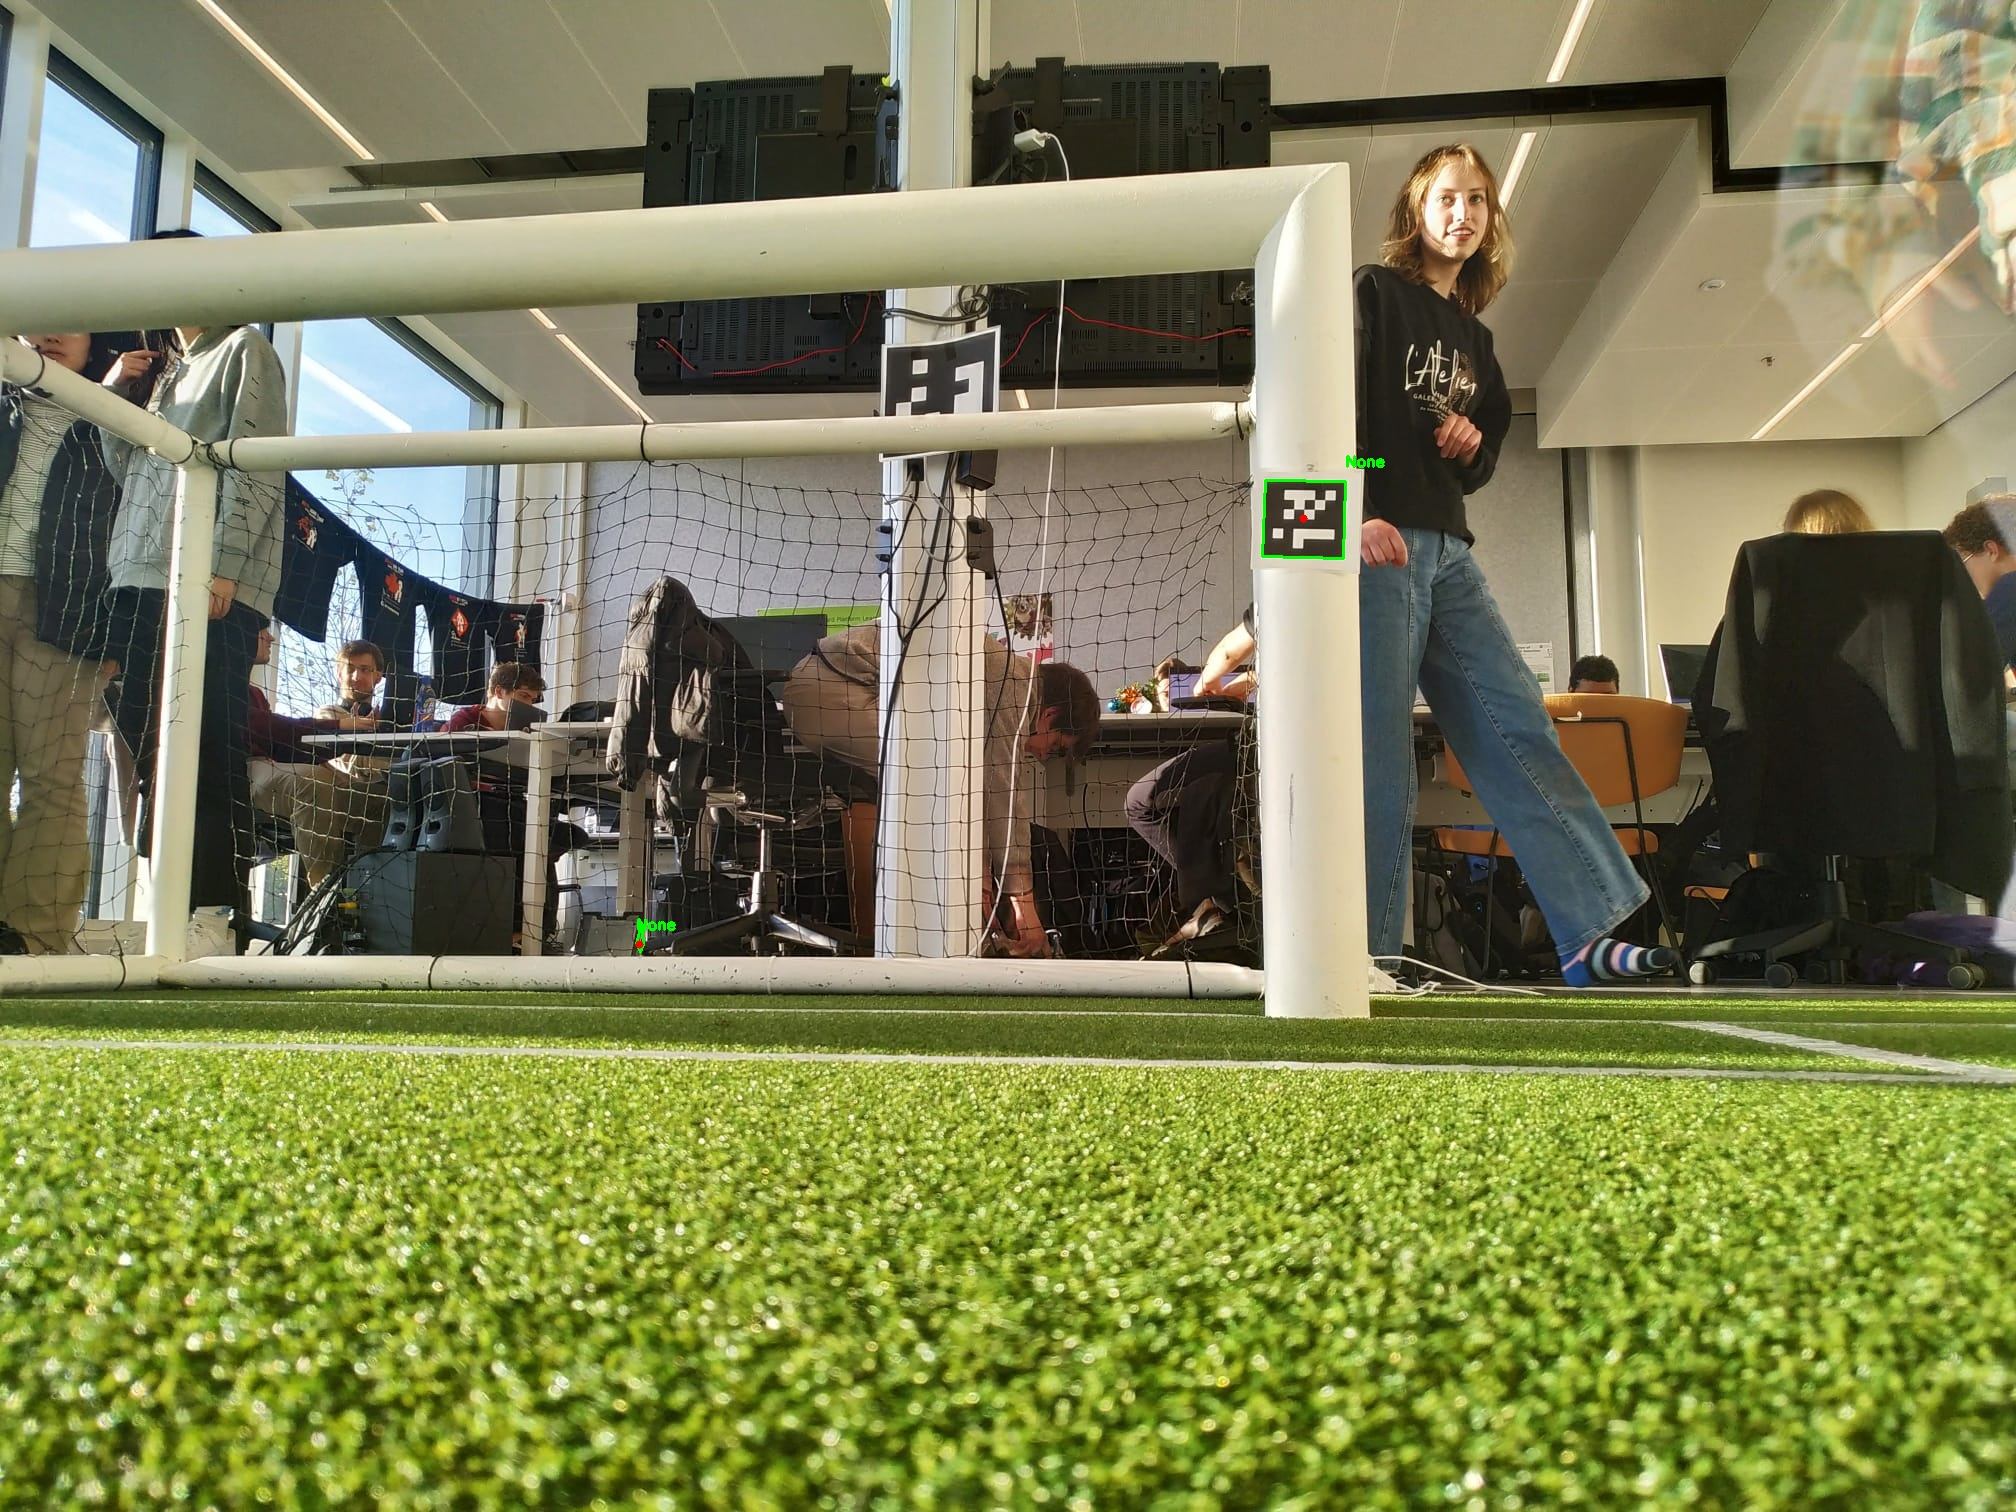

File: image3.jpeg


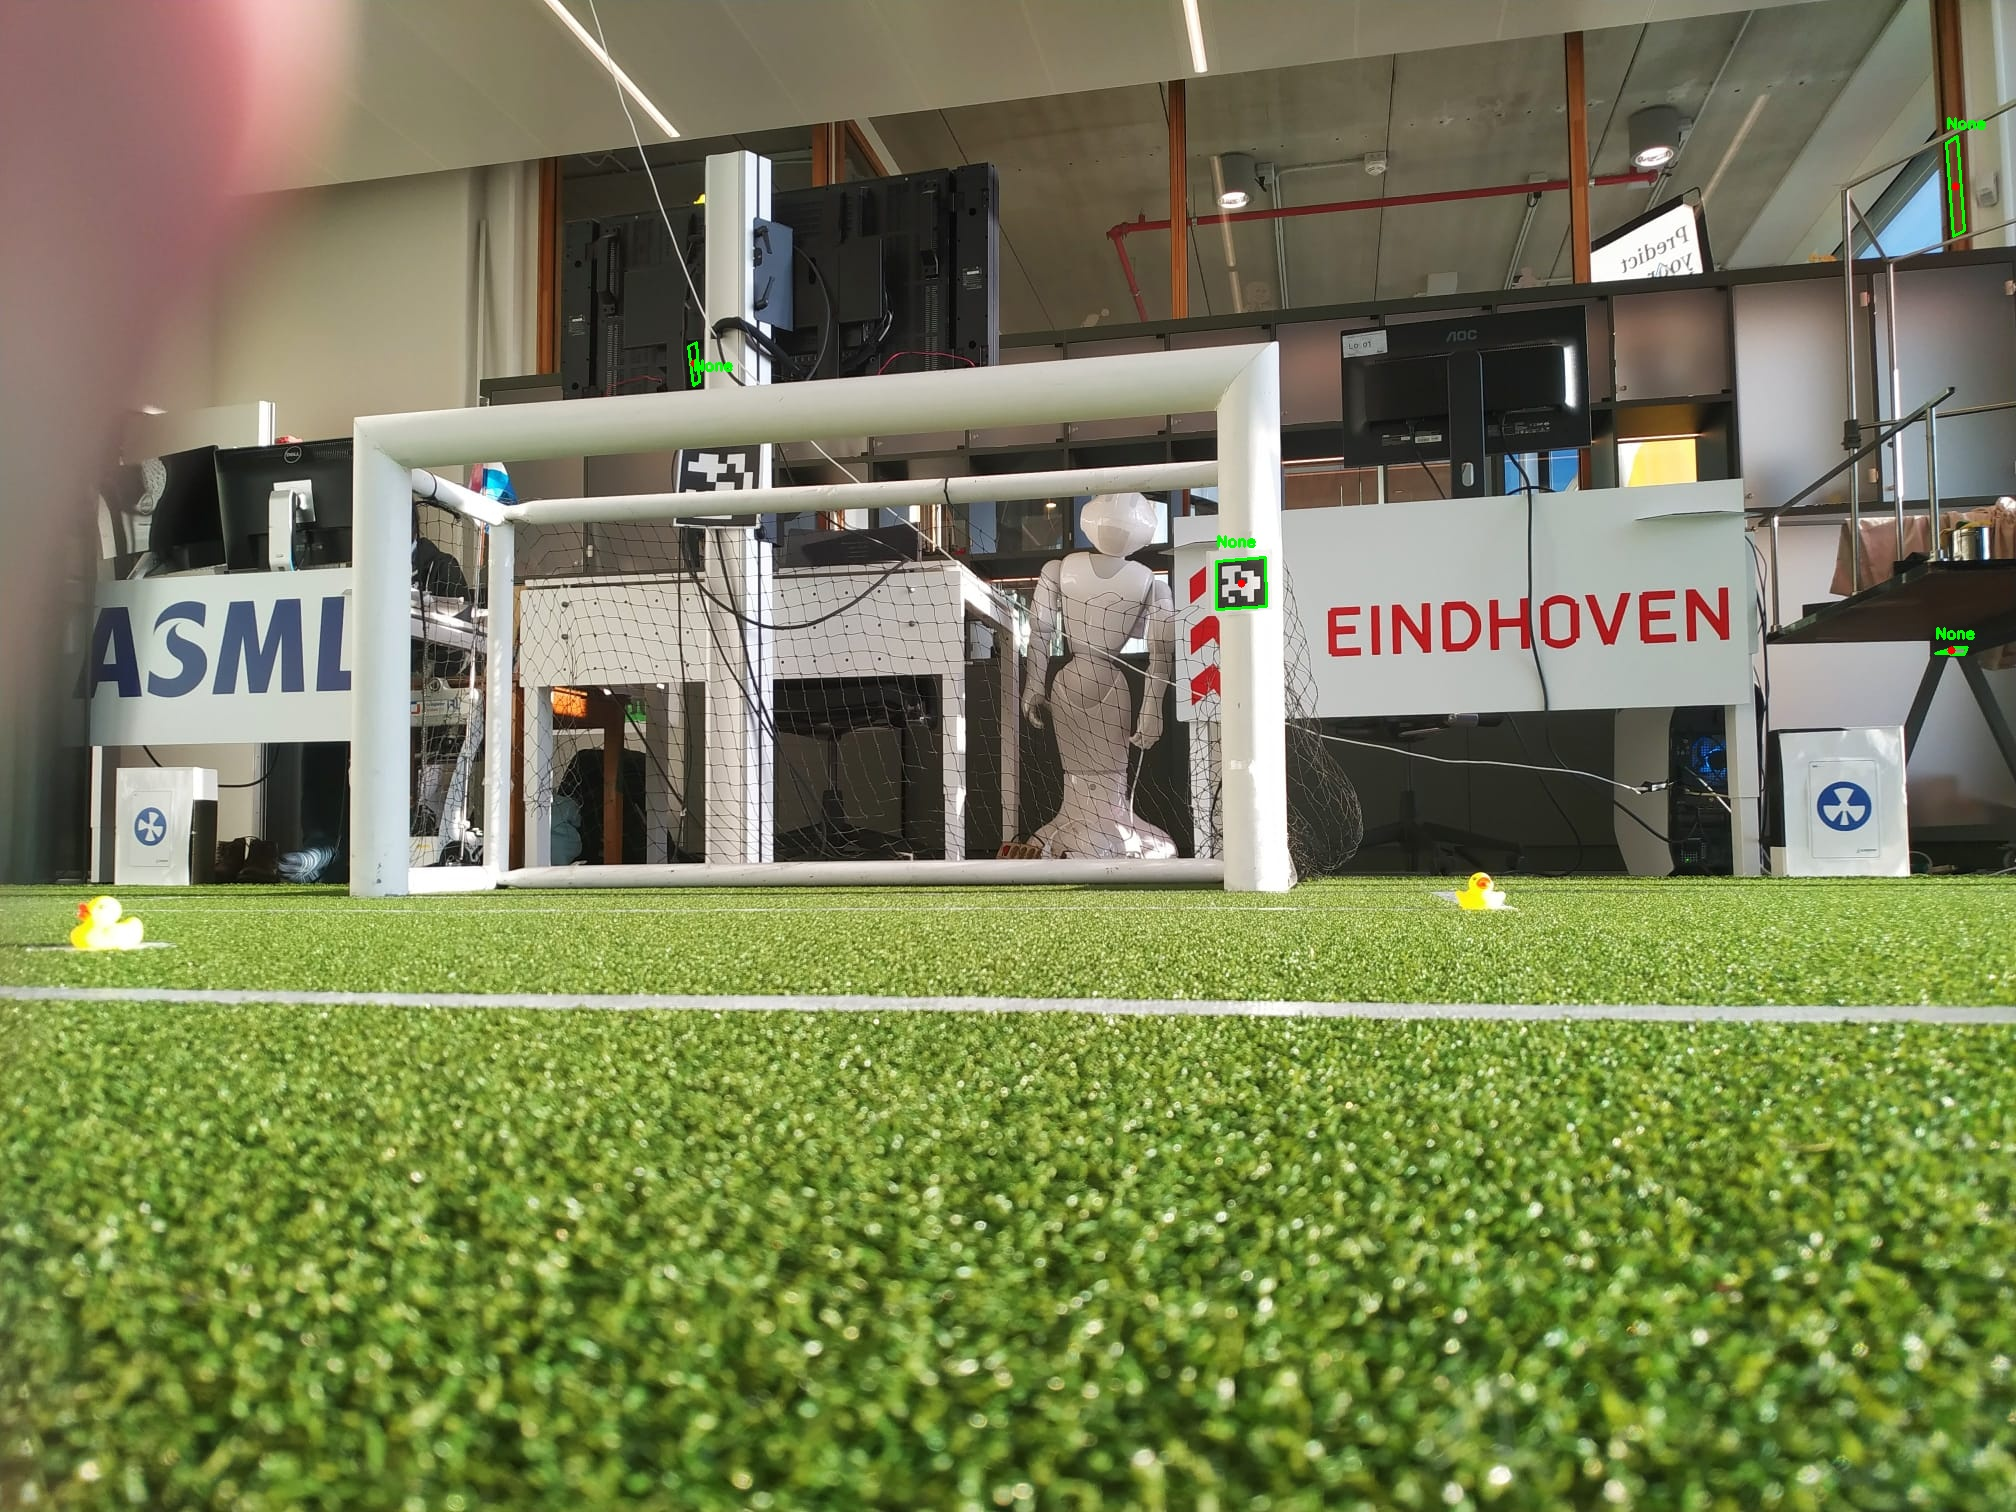

File: image4.jpeg


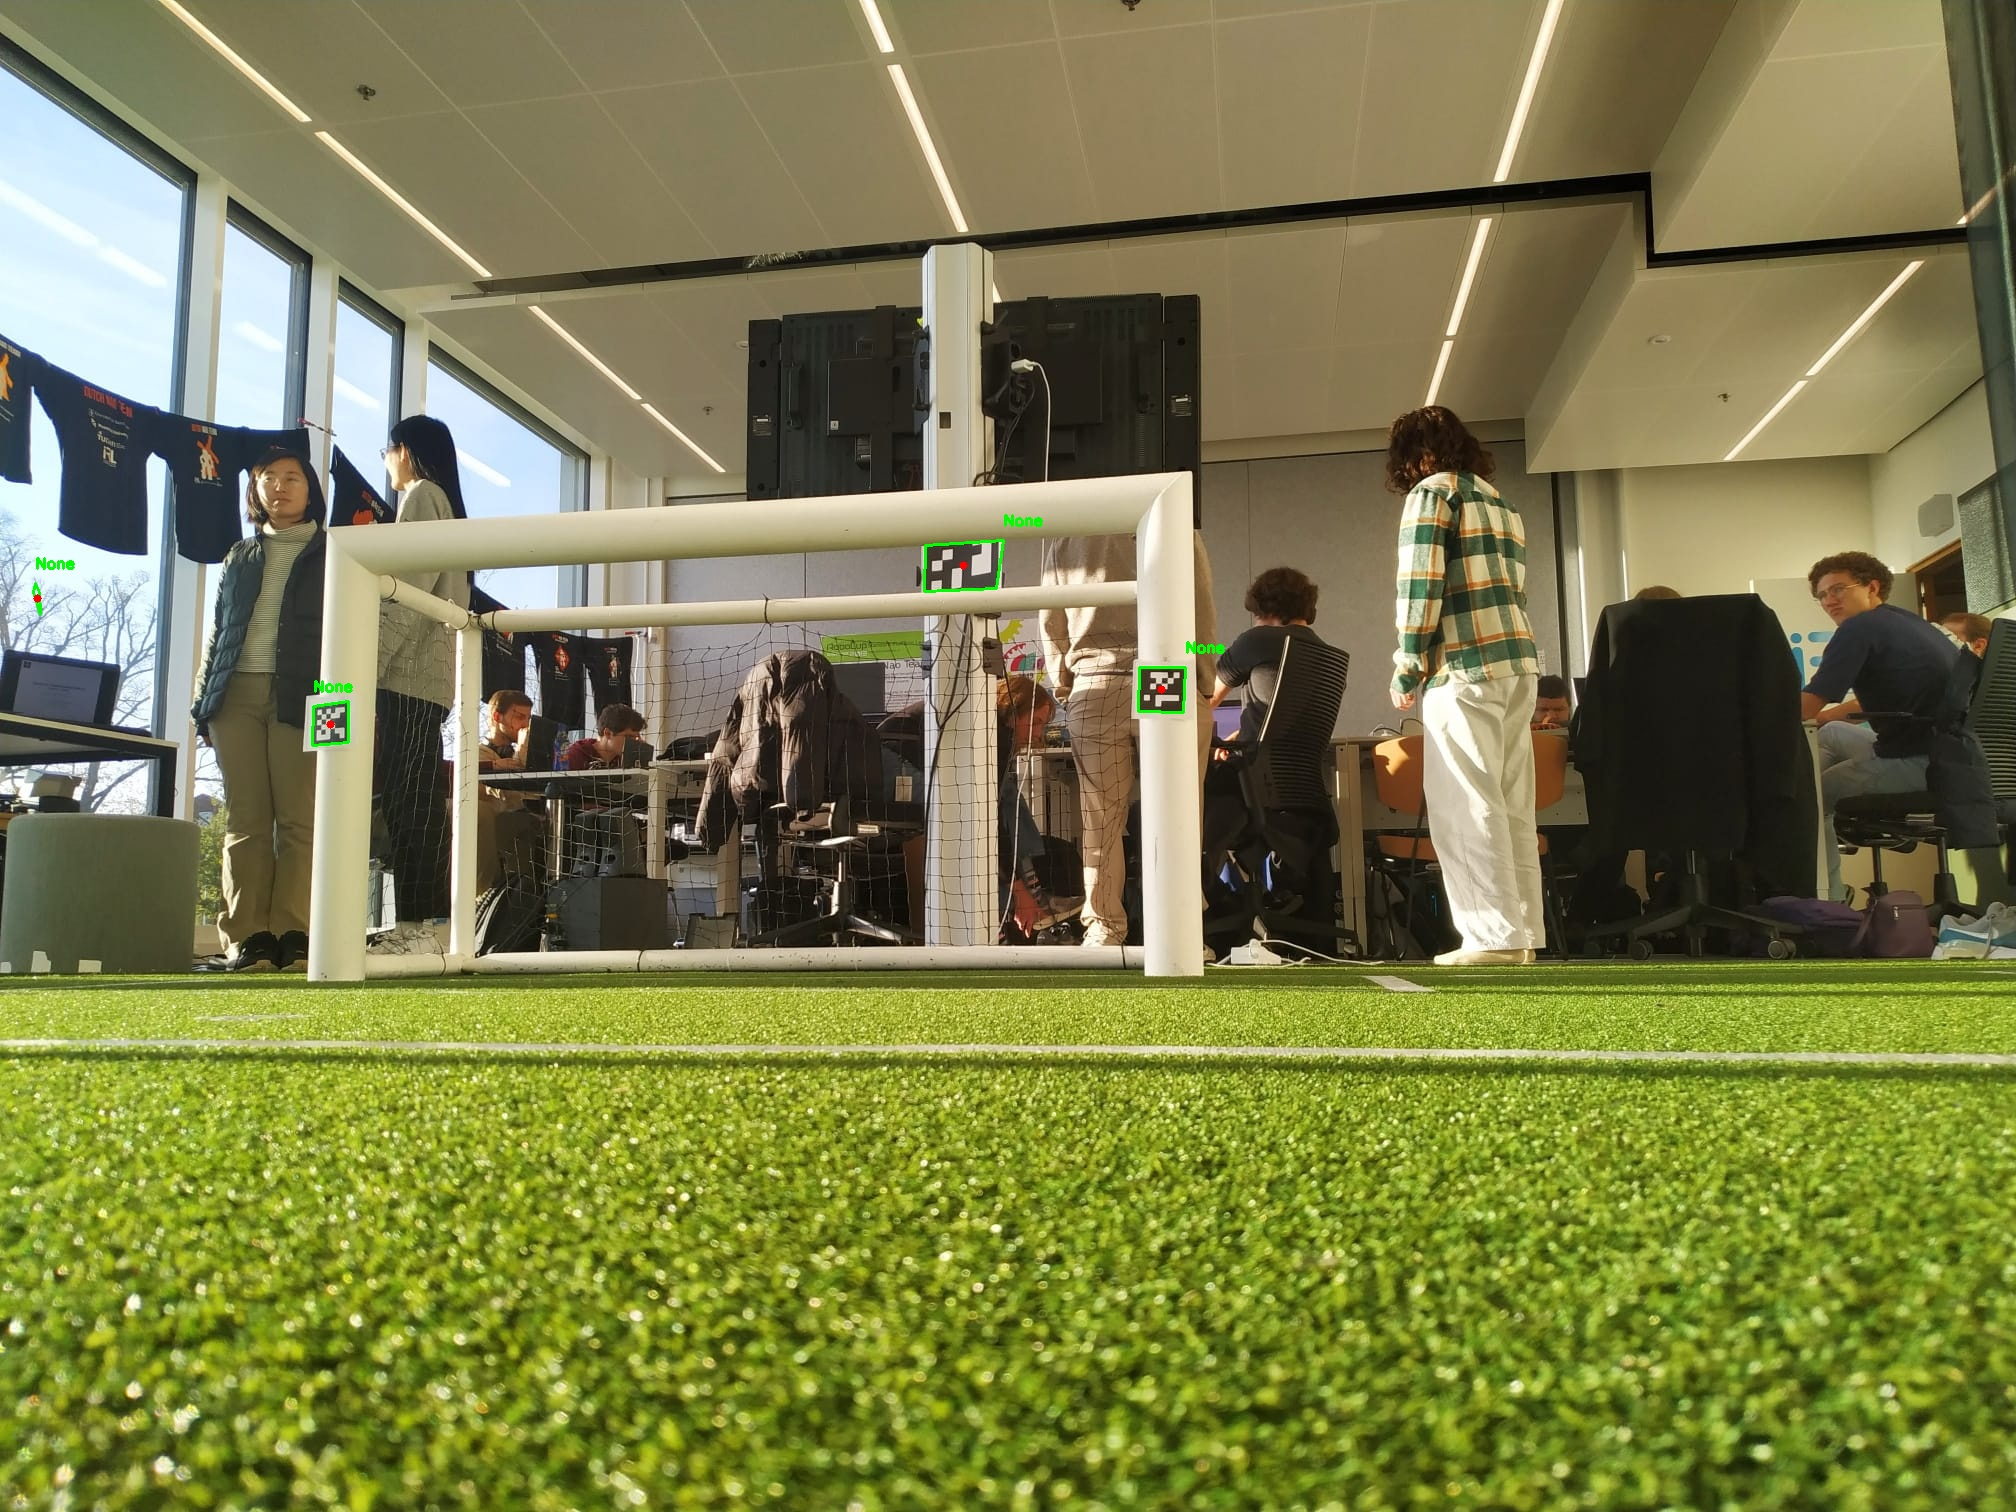

File: image5.jpeg


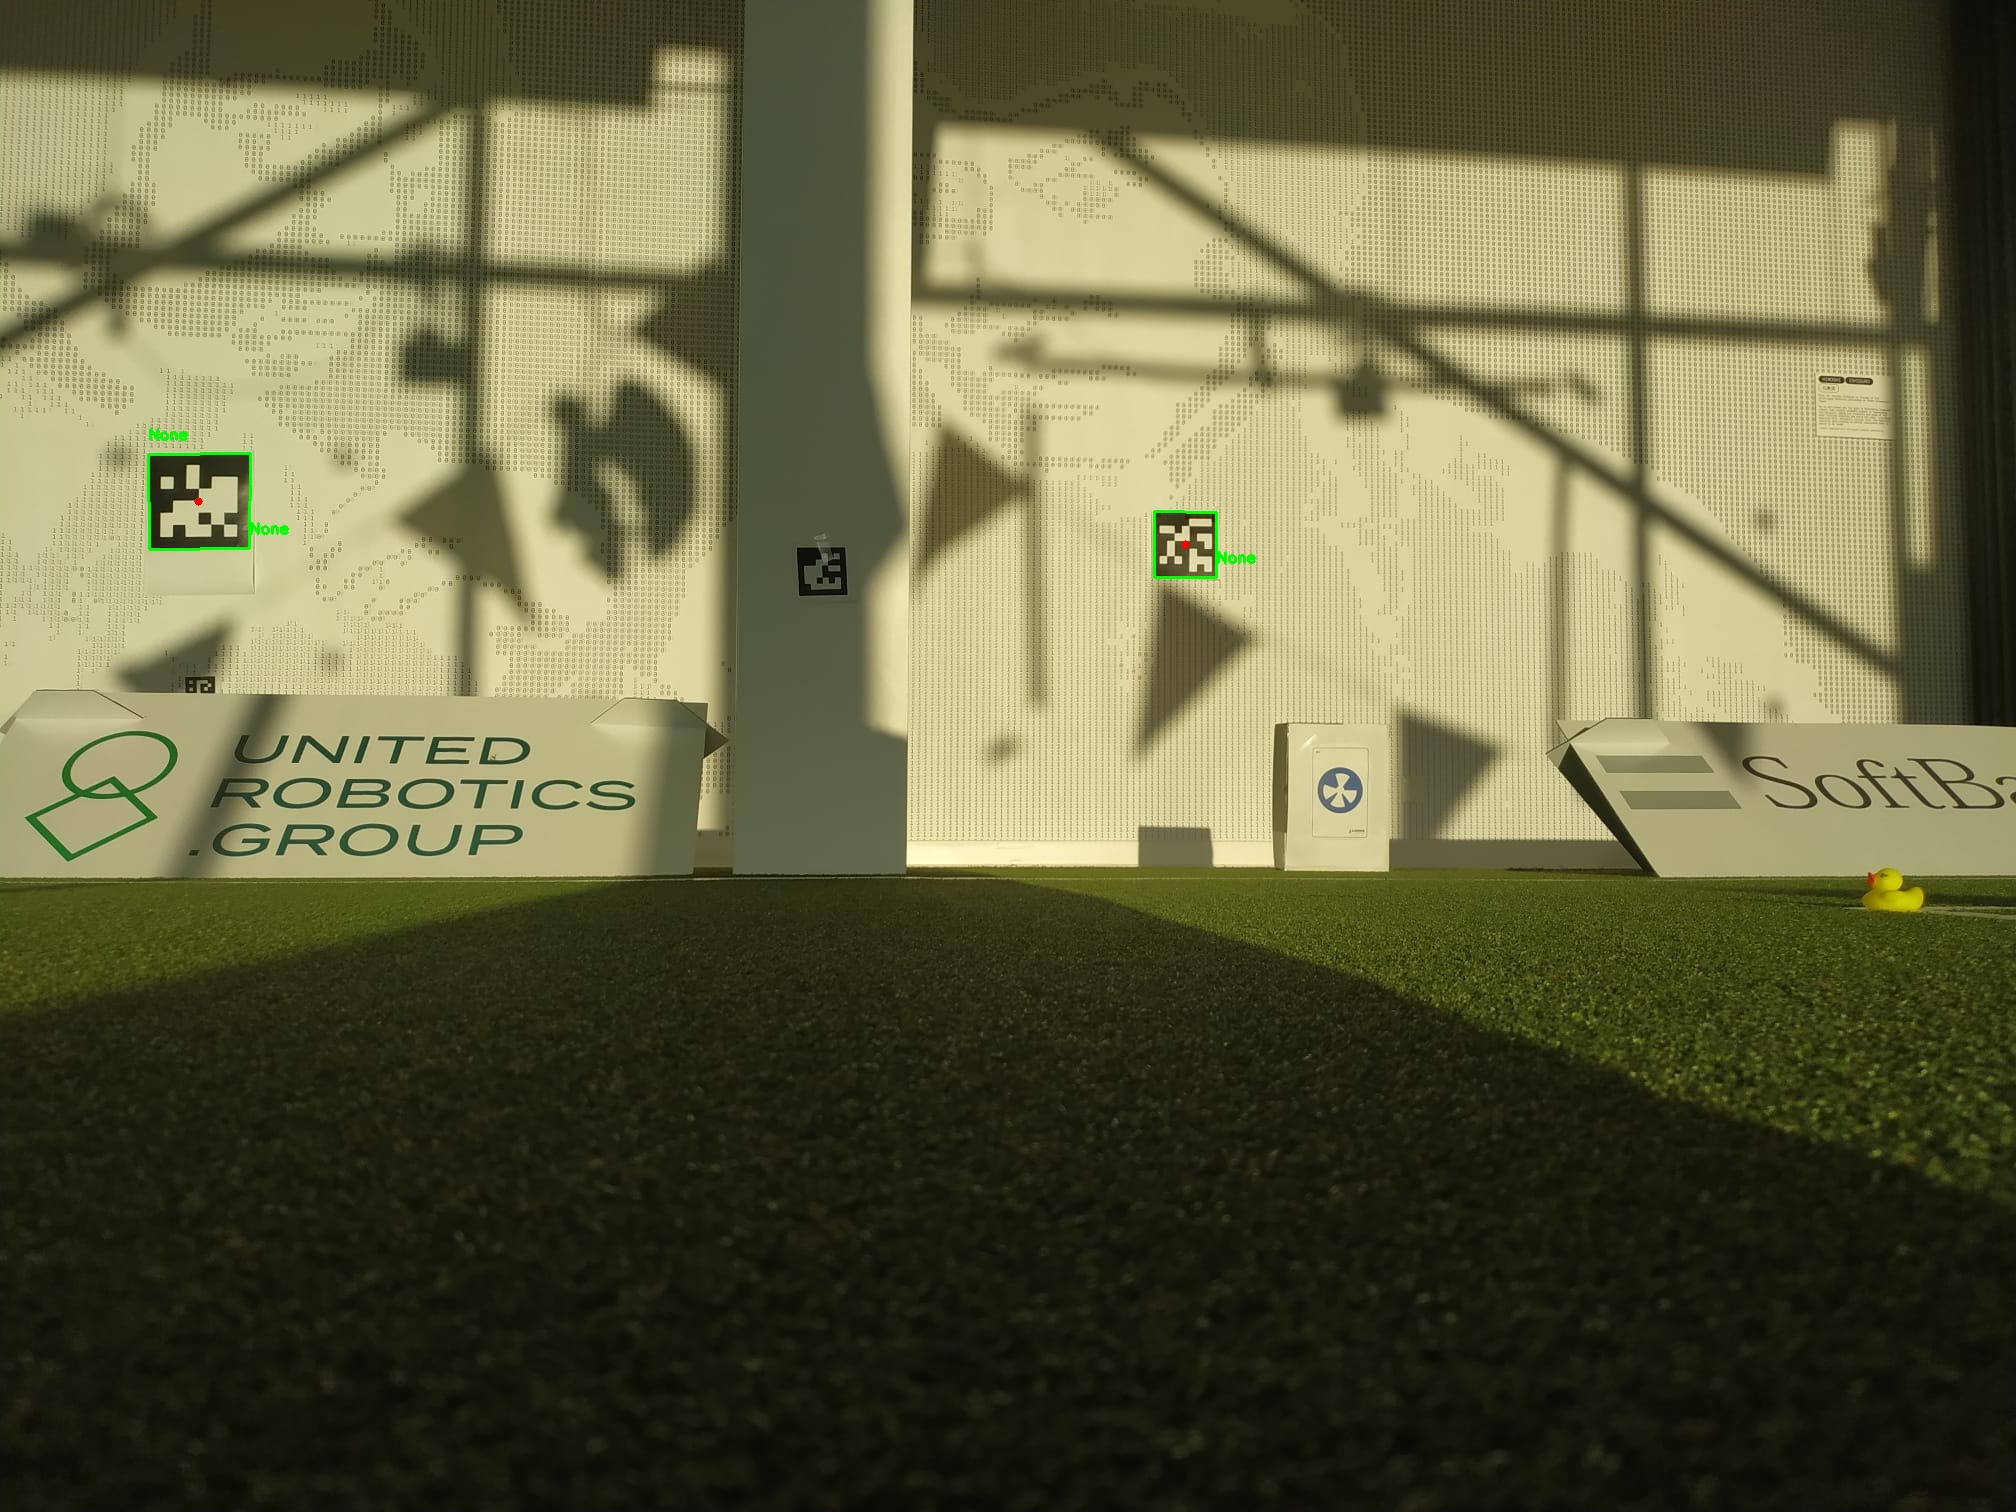

In [27]:
for f in frames:
    f_path = os.path.join("..", "..", "..", "assets", f)
    frame = cv2.imread(f_path)
    if frame is None:
        raise ValueError(f"Could not load image: {f_path}")

    all_corners, all_marker_ids = [], []
    for desired_aruco_dictionary in ARUCO_DICT.keys():
        this_aruco_dictionary = cv2.aruco.getPredefinedDictionary(
            ARUCO_DICT[desired_aruco_dictionary]
        )
        this_aruco_parameters = cv2.aruco.DetectorParameters()
        # import code; code.interact(local=dict(globals(), **locals()))
        #
        # this_aruco_parameters.adaptiveThreshWinSizeMin = 3
        # this_aruco_parameters.adaptiveThreshWinSizeMin = 5
        # this_aruco_parameters.adaptiveThreshWinSizeMax = 21
        # this_aruco_parameters.adaptiveThreshWinSizeStep = 4
        # this_aruco_parameters.minMarkerPerimeterRate = 0.07
        # this_aruco_parameters.minMarkerPerimeterRate = 0.01
        # this_aruco_parameters.maxMarkerPerimeterRate = 4.0

        (corners, ids, rejected) = cv2.aruco.detectMarkers(  # TODO maybe use rejected
            frame, this_aruco_dictionary, parameters=this_aruco_parameters
        )
        all_corners.extend(corners)
        all_marker_ids.append(ids)

    if len(all_corners) > 0:
        for marker_corner, marker_id in zip(all_corners, all_marker_ids):
            corners = marker_corner.reshape((4, 2))
            (top_left, top_right, bottom_right, bottom_left) = corners

            top_right = (int(top_right[0]), int(top_right[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
            bottom_left = (int(bottom_left[0]), int(bottom_left[1]))
            top_left = (int(top_left[0]), int(top_left[1]))

            cv2.line(frame, top_left, top_right, (0, 255, 0), 2)
            cv2.line(frame, top_right, bottom_right, (0, 255, 0), 2)
            cv2.line(frame, bottom_right, bottom_left, (0, 255, 0), 2)
            cv2.line(frame, bottom_left, top_left, (0, 255, 0), 2)

            center_x = int((top_left[0] + bottom_right[0]) / 2.0)
            center_y = int((top_left[1] + bottom_right[1]) / 2.0)
            cv2.circle(frame, (center_x, center_y), 4, (0, 0, 255), -1)

            cv2.putText(
                frame,
                str(marker_id),
                (top_left[0], top_left[1] - 15),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (0, 255, 0),
                2,
            )
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    temp_path = f'temp_{f}'
    cv2.imwrite(temp_path, frame)
    
    print(f"File: {f}")
    display(Image(filename=temp_path))
    os.remove(temp_path)

    # Later do the following instead of displaying the image
    # cv2.imshow("ArUco Markers", frame)

# Keep the window open until 'q' is pressed or window is closed
# while True:
#     key = cv2.waitKey(1) & 0xFF
#     if key == ord('q') or cv2.getWindowProperty('ArUco Markers', cv2.WND_PROP_VISIBLE) < 1:
#         break

# # Cleanup
# cv2.destroyAllWindows()
# # Handle potential macOS window closing issues
# for i in range(4):
#     cv2.waitKey(1)